In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## **Reading dataset**

In [ ]:
dataframe = pd.read_csv("/content/Email.csv")
dataframe = dataframe.drop(list(dataframe)[0], axis=1)

In [ ]:
dataframe.head()

,body_text,label
0,mr martin francis abidjan cote d ivoire west a...,0
1,url http boingboing net 85535421 date not supp...,1
2,on thu sep 05 2002 at 06 16 57pm 0500 mike bur...,1
3,anyone heard of this law before back when i w...,1
4,i don t understand how does sorting one folde...,1


In [ ]:
dataframe.tail()

,body_text,label
2848,for example take the recent cbc olympics site...,1
2849,url http www newsisfree com click 1 8388719 17...,1
2850,do you like sexy animals doing the wild thing...,0
2851,benoit claimed the prize for his size 14 feet...,1
2852,o owen byrne writes o from the local paper th...,1


In [ ]:
message_data = dataframe.iloc[:, 0].values

In [ ]:
message_data

array(['mr martin francis abidjan cote d ivoire west africa tel 225 05775748 urgent and noble proposal attn director dear i wish to extend my greeting to you and your entire family i got your contact from the ivoirian chamber of commerce i prayed over it and selected your name among other names because of its esteeming nature morever after my strong prayers and fasting god reveals to me that you are straight forward honest and god s person this is the reason i never waste time to propose you this business for our mutual benefits infact you will never regret it provided you give me your possible best cooperate hand believe me i am martin francis a cote d ivoire national and the only child of late mr and mrs francis my late father was the former financial controller of c te d ivoire telecommunication citelcom my father died due to the heat of political crisis in my country recently last years but i am motherless since before my fathers late and the death of my mother on 26 september 1993

In [ ]:
labels = dataframe.iloc[:, 1].values

In [ ]:
labels

array([0, 1, 1, ..., 0, 1, 1])

## **Tokenization Variables**

In [ ]:
vocab_size = 10000
embedding_dim = 32
max_length = 320
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

## **Training and Validation data**

In [ ]:
train_size = int(len(message_data) * training_portion)

train_sentences = message_data[:train_size]
train_labels = labels[:train_size]

validation_sentences = message_data[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

2282
2282
2282
571
571


## **Tokenization**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

762
320
48
320
192
320


In [ ]:
print(train_sequences[0])
print(train_padded[0])

print(train_sequences[1])
print(train_padded[1])

print(train_sequences[10])
print(train_padded[10])

[265, 2825, 6911, 5776, 1, 119, 6316, 1245, 1246, 2221, 4922, 1, 2478, 4, 8915, 2417, 6317, 970, 1316, 8, 521, 3, 3445, 47, 8916, 3, 12, 4, 31, 985, 371, 8, 273, 31, 525, 22, 2, 1, 4923, 5, 1895, 8, 1, 121, 11, 4, 1931, 31, 203, 1403, 84, 913, 122, 5, 124, 1, 1678, 1, 154, 47, 1404, 1, 4, 1, 1550, 8917, 3, 87, 10, 12, 26, 1783, 1175, 3938, 4, 1550, 14, 523, 16, 9, 2, 609, 8, 290, 2929, 69, 3, 3446, 12, 16, 169, 13, 55, 4924, 1817, 8918, 12, 41, 290, 8919, 11, 1098, 12, 305, 87, 31, 517, 204, 6318, 813, 652, 87, 8, 187, 2825, 6911, 6, 1, 119, 6316, 511, 4, 2, 71, 1600, 5, 1055, 265, 4, 4133, 6911, 47, 1055, 1066, 37, 2, 1428, 692, 1, 5, 116, 2826, 119, 6316, 1, 1, 47, 1066, 1743, 792, 3, 2, 5777, 5, 512, 2827, 7, 47, 444, 932, 259, 172, 33, 8, 187, 1, 225, 192, 47, 5340, 1055, 4, 2, 1247, 5, 47, 1744, 15, 535, 301, 3163, 37, 25, 6, 1449, 5, 1, 1188, 32, 55, 371, 1128, 73, 1, 333, 58, 122, 5, 47, 5340, 2122, 6319, 45, 599, 63, 216, 346, 25, 158, 297, 47, 1066, 4, 1471, 33, 2352, 122, 155

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

571
(571, 320)


## **Model Preperation**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 320, 32)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


## **Training the model with data**

In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/10
72/72 - 3s - loss: 0.5888 - accuracy: 0.8273 - val_loss: 0.4584 - val_accuracy: 0.8511
Epoch 2/10
72/72 - 0s - loss: 0.3734 - accuracy: 0.8620 - val_loss: 0.3562 - val_accuracy: 0.8511
Epoch 3/10
72/72 - 0s - loss: 0.3110 - accuracy: 0.8663 - val_loss: 0.3063 - val_accuracy: 0.8651
Epoch 4/10
72/72 - 0s - loss: 0.2413 - accuracy: 0.8996 - val_loss: 0.2157 - val_accuracy: 0.9089
Epoch 5/10
72/72 - 0s - loss: 0.1522 - accuracy: 0.9474 - val_loss: 0.1290 - val_accuracy: 0.9650
Epoch 6/10
72/72 - 0s - loss: 0.0929 - accuracy: 0.9724 - val_loss: 0.0855 - val_accuracy: 0.9685
Epoch 7/10
72/72 - 0s - loss: 0.0633 - accuracy: 0.9781 - val_loss: 0.0620 - val_accuracy: 0.9755
Epoch 8/10
72/72 - 0s - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0479 - val_accuracy: 0.9825
Epoch 9/10
72/72 - 0s - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.0388 - val_accuracy: 0.9912
Epoch 10/10
72/72 - 0s - loss: 0.0275 - accuracy: 0.9934 - val_loss: 0.0318 - val_accuracy: 0.9895


## **Traning Curves**

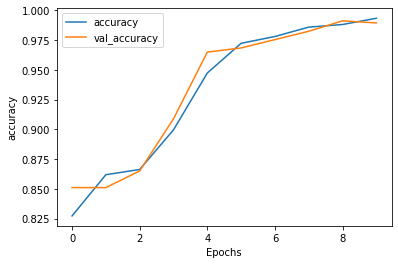

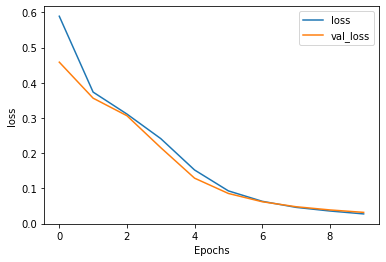

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## **Preditions**

In [ ]:
with open("sample11.txt", "r") as file:
    message = file.read()

In [ ]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    l = cleantext.replace('\n',' ')
    s = re.sub(r"[^a-zA-Z0-9]+", ' ', l)
    s = s.lower()
    return s

In [ ]:
message_clean_html = [cleanhtml(message)]

In [ ]:
message_token = tokenizer.texts_to_sequences(message_clean_html)
message_pad = pad_sequences(message_token, padding=padding_type, maxlen=max_length)

In [ ]:
if model.predict(message_pad)[0][0] >= 0.5:
  print("This message is Ham")
else:
  print("This message is Spam")

This message is Ham


## **Writing layer values into Tab Seperated Values**

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 32)


In [ ]:
len(reverse_word_index)

21185

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 7973):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>